In [31]:
import torch

with open("data/names.txt") as f:
    words = f.read().splitlines()

chars = ["."] + sorted(list(set(''.join(words))))

str_to_int = {s: i for i, s in enumerate(chars)}
int_to_str = {i: s for s, i in str_to_int.items()}


In [32]:
bigram_table = N = torch.zeros((27, 27), dtype=torch.int32)

In [33]:
for word in words:
    characters = ["."] + list(word) + ["."]
    for c, n in zip(characters, characters[1:]):
        index1 = str_to_int[c]
        index2 = str_to_int[n]
        
        bigram_table[index1, index2] += 1

In [34]:
import matplotlib.pyplot as plt

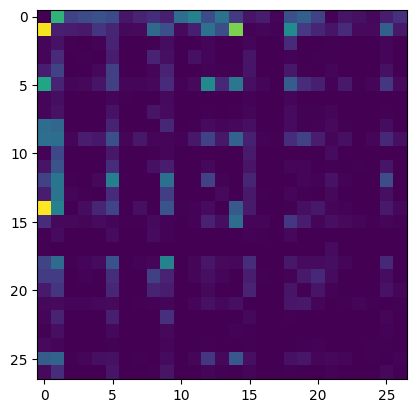

In [35]:
plt.imshow(bigram_table)

In [36]:
p = N.float()
p = p / p.sum(dim=1, keepdim=True)

bigram_table = p # NOTE: now it is normalised as probabilities

def generate_name_bigram():
    output = ""
    index = 0
    while True:
        probs = bigram_table[index]
        index = torch.multinomial(probs, num_samples=1, replacement=True).item()
        char = int_to_str[index]
        output += char 
        if index == 0:
            break 
    return output

In [37]:
for x in range(10):
    name = generate_name_bigram()
    print(name)
    

anallanieerako.
mani.
hatahish.
makaly.
ainaolys.
ilishorebrisyve.
leru.
jan.
an.
manesyn.
